In [50]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson, expon, norm, t, chi2, f, skew, kurtosis
from numpy.linalg import inv

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats import weightstats as ssw
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.proportion import proportions_ztest

from statsmodels.stats import proportion as ssp
from statsmodels.stats.rates import test_poisson, test_poisson_2indep

from sklearn.model_selection import train_test_split

import scipy

In [51]:
#Load the dataset in a Dataframe
df = pd.read_csv("hotel_bookings.csv")

## Know about Data

In [52]:
#Print the top 10 columns of the dataset
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [53]:
#Check the number of Rows and Columns in the dataset
#Number of rows: 119390
#Number of Columns: 32
df.shape

(119390, 32)

In [54]:
#Check the info of the dataset
#Here we get the info of all the columns
#Info like: Column name, Non_null Count, DataType of that column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Handle missing values in columns


In [55]:
# This displays the number of missing (null) values in each column
df.isna().sum()

#From the output, we observe that the columns with missing values are:
#children', 'country', 'agent', and 'company', listed in order from the fewest to the most missing entries.'''


,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [56]:
#Percentage of Null values in Company Column
(df['company'].isnull().sum() / len(df)) * 100

np.float64(94.30689337465449)

In [57]:
# The 'agent' column contains IDs of booking agents.
# If a booking was made through an agent, the agent ID is recorded; otherwise, the value is null.
# To handle this, we replace null values with 0 (indicating no agent involved)
# and convert the float IDs to integers for better readability and consistency.

df['agent'] = df['agent'].fillna(0)
df['agent'] = df['agent'].astype(int)

# The 'company' column contains 94.31% missing values,
# making it largely uninformative for analysis.
# Hence, we drop this column.

df.drop(['company'], axis=1, inplace=True, errors='ignore')


In [58]:
# The children column contains 4 missing values only, so let's replace them with 0.
# Replacing with mean/median could distort specific booking details.
df['children'] = df['children'].fillna(0)

# Country column has some missing values.
# We'll replace them with 'PRT', the most common country in the dataset (mode),
# which is a safe and practical assumption.
df['country'] = df['country'].fillna(df['country'].mode()[0])


In [59]:
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


## Convert categorical variables into usable formats for analysis

In [60]:
# See distinct values in each categorical column
for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].unique())





Column: hotel
['Resort Hotel' 'City Hotel']

Column: is_canceled
[0 1]

Column: lead_time
[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 

In [61]:
#Create a dictionary to map the columns with their data types

dtype_map = {
    'hotel': 'category',
    'arrival_date_month': 'category',
    'meal': 'category',
    'country': 'category',
    'market_segment': 'category',
    'distribution_channel': 'category',
    'reserved_room_type': 'category',
    'assigned_room_type': 'category',
    'deposit_type': 'category',
    'customer_type': 'category',
    'reservation_status': 'category',
    'children': 'int16',
    'agent': 'int32',
}

#for loop to iterate through every column
for col, dtype in dtype_map.items():
    df[col] = df[col].astype(dtype)

In [62]:
df.dtypes

,0
hotel,category
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,category
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


## Parse and standardize date columns

In [63]:
#Convert the column reservation_status_date to datatime 0
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

## Create derived fields

In [64]:
#Combine the year, month, and day columns into a single datetime column of the arrival
# This helps in better filtering and reducing the number of columns
df['arrival_date'] = pd.to_datetime(
    df['arrival_date_year'].astype(str) + '-' +
    df['arrival_date_month'].astype(str) + '-' +
    df['arrival_date_day_of_month'].astype(str),
    format='%Y-%B-%d',
    errors='coerce'                                           # Coerce invalid dates to NaT (helps avoid crashing)
)

# Extract the day of the week from the new 'arrival_date' column
df['arrival_day_name'] = df['arrival_date'].dt.day_name()

# Drop the original year, month, and day columns
df.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'], axis=1, inplace=True)


In [65]:
# Creating a new column which shows how much days does the individual stayed in hotel
df = df.copy()
df['total_stay_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df.head()

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_day_name,total_stay_nights
0,Resort Hotel,0,342,27,0,0,2,0,0,BB,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,Wednesday,0
1,Resort Hotel,0,737,27,0,0,2,0,0,BB,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,Wednesday,0
2,Resort Hotel,0,7,27,0,1,1,0,0,BB,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,Wednesday,1
3,Resort Hotel,0,13,27,0,1,1,0,0,BB,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,Wednesday,1
4,Resort Hotel,0,14,27,0,2,2,0,0,BB,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,Wednesday,2


In [66]:
# Calculate the actual checkout/departure date by adding the total stay days to the arrival date
df = df.copy()
df['departure_date'] = df['arrival_date'] + pd.to_timedelta(df['total_stay_nights'], unit='D')

In [67]:
# total_guests = adults + children + babies
df['total_members'] = df['adults'] + df['children'] + df['babies']


In [68]:

column_order = [
    'hotel', 'is_canceled', 'lead_time',
    'adults', 'children', 'babies', 'total_members','country', 'is_repeated_guest',
    'previous_cancellations', 'previous_bookings_not_canceled',
    'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
    'market_segment', 'distribution_channel', 'customer_type',
    'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests',
    'reservation_status', 'arrival_day_name',
    'stays_in_weekend_nights', 'stays_in_week_nights', 'total_stay_nights', 'arrival_date','reservation_status_date','departure_date'
]

# Reorder the DataFrame
df = df[column_order]
df.head()

,hotel,is_canceled,lead_time,adults,children,babies,total_members,country,is_repeated_guest,previous_cancellations,...,required_car_parking_spaces,total_of_special_requests,reservation_status,arrival_day_name,stays_in_weekend_nights,stays_in_week_nights,total_stay_nights,arrival_date,reservation_status_date,departure_date
0,Resort Hotel,0,342,2,0,0,2,PRT,0,0,...,0,0,Check-Out,Wednesday,0,0,0,2015-07-01,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2,0,0,2,PRT,0,0,...,0,0,Check-Out,Wednesday,0,0,0,2015-07-01,2015-07-01,2015-07-01
2,Resort Hotel,0,7,1,0,0,1,GBR,0,0,...,0,0,Check-Out,Wednesday,0,1,1,2015-07-01,2015-07-02,2015-07-02
3,Resort Hotel,0,13,1,0,0,1,GBR,0,0,...,0,0,Check-Out,Wednesday,0,1,1,2015-07-01,2015-07-02,2015-07-02
4,Resort Hotel,0,14,2,0,0,2,GBR,0,0,...,0,1,Check-Out,Wednesday,0,2,2,2015-07-01,2015-07-03,2015-07-03


## Remove duplicate records if any,

In [69]:
#drop the duplicate records and keep first record only
df = df.drop_duplicates(keep='first')
df

,hotel,is_canceled,lead_time,adults,children,babies,total_members,country,is_repeated_guest,previous_cancellations,...,required_car_parking_spaces,total_of_special_requests,reservation_status,arrival_day_name,stays_in_weekend_nights,stays_in_week_nights,total_stay_nights,arrival_date,reservation_status_date,departure_date
0,Resort Hotel,0,342,2,0,0,2,PRT,0,0,...,0,0,Check-Out,Wednesday,0,0,0,2015-07-01,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2,0,0,2,PRT,0,0,...,0,0,Check-Out,Wednesday,0,0,0,2015-07-01,2015-07-01,2015-07-01
2,Resort Hotel,0,7,1,0,0,1,GBR,0,0,...,0,0,Check-Out,Wednesday,0,1,1,2015-07-01,2015-07-02,2015-07-02
3,Resort Hotel,0,13,1,0,0,1,GBR,0,0,...,0,0,Check-Out,Wednesday,0,1,1,2015-07-01,2015-07-02,2015-07-02
4,Resort Hotel,0,14,2,0,0,2,GBR,0,0,...,0,1,Check-Out,Wednesday,0,2,2,2015-07-01,2015-07-03,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2,0,0,2,BEL,0,0,...,0,0,Check-Out,Wednesday,2,5,7,2017-08-30,2017-09-06,2017-09-06
119386,City Hotel,0,102,3,0,0,3,FRA,0,0,...,0,2,Check-Out,Thursday,2,5,7,2017-08-31,2017-09-07,2017-09-07
119387,City Hotel,0,34,2,0,0,2,DEU,0,0,...,0,4,Check-Out,Thursday,2,5,7,2017-08-31,2017-09-07,2017-09-07
119388,City Hotel,0,109,2,0,0,2,GBR,0,0,...,0,0,Check-Out,Thursday,2,5,7,2017-08-31,2017-09-07,2017-09-07


In [70]:
df.head()

,hotel,is_canceled,lead_time,adults,children,babies,total_members,country,is_repeated_guest,previous_cancellations,...,required_car_parking_spaces,total_of_special_requests,reservation_status,arrival_day_name,stays_in_weekend_nights,stays_in_week_nights,total_stay_nights,arrival_date,reservation_status_date,departure_date
0,Resort Hotel,0,342,2,0,0,2,PRT,0,0,...,0,0,Check-Out,Wednesday,0,0,0,2015-07-01,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2,0,0,2,PRT,0,0,...,0,0,Check-Out,Wednesday,0,0,0,2015-07-01,2015-07-01,2015-07-01
2,Resort Hotel,0,7,1,0,0,1,GBR,0,0,...,0,0,Check-Out,Wednesday,0,1,1,2015-07-01,2015-07-02,2015-07-02
3,Resort Hotel,0,13,1,0,0,1,GBR,0,0,...,0,0,Check-Out,Wednesday,0,1,1,2015-07-01,2015-07-02,2015-07-02
4,Resort Hotel,0,14,2,0,0,2,GBR,0,0,...,0,1,Check-Out,Wednesday,0,2,2,2015-07-01,2015-07-03,2015-07-03


In [71]:
df.shape

(87363, 31)

## Handle outliers

In [72]:
df.dtypes

,0
hotel,category
is_canceled,int64
lead_time,int64
adults,int64
children,int16
babies,int64
total_members,int64
country,category
is_repeated_guest,int64
previous_cancellations,int64


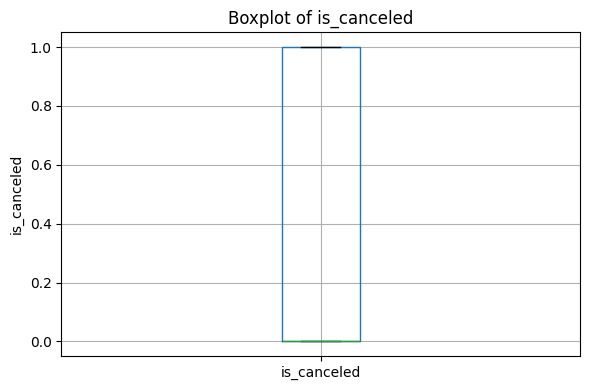

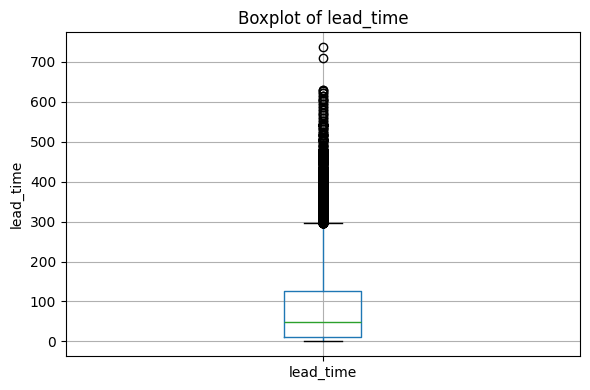

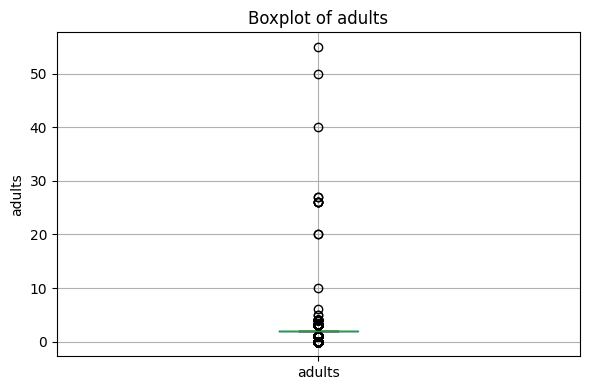

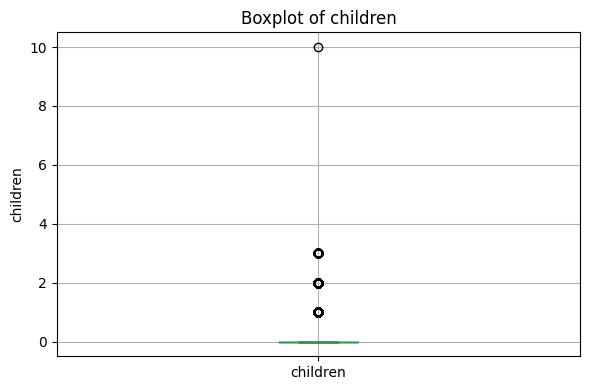

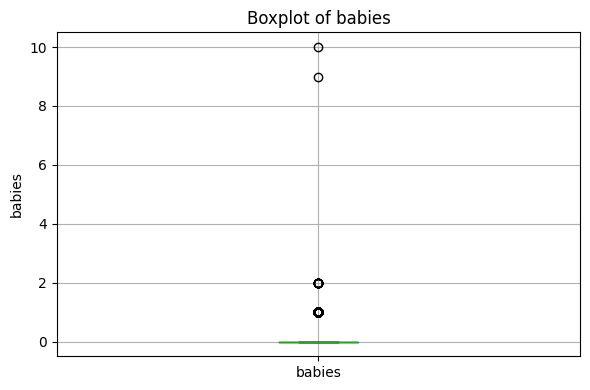

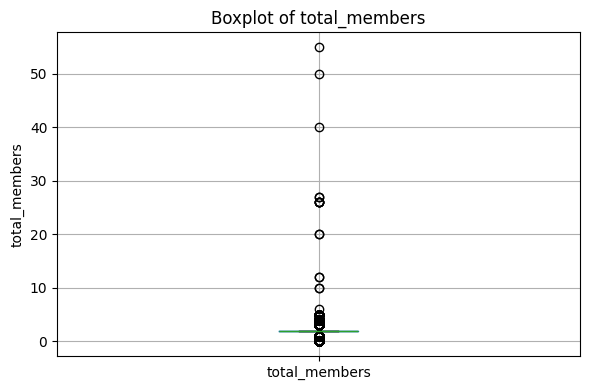

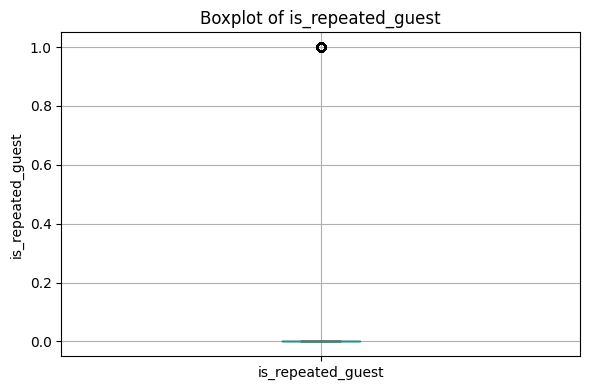

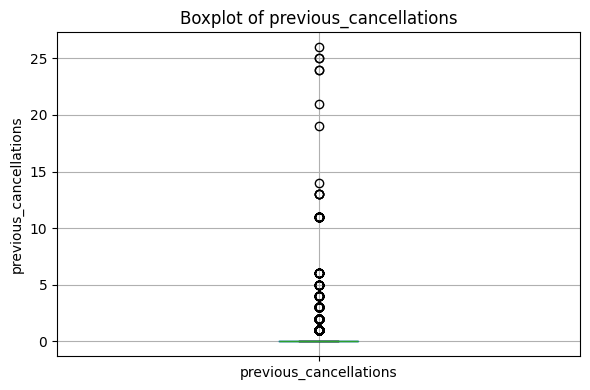

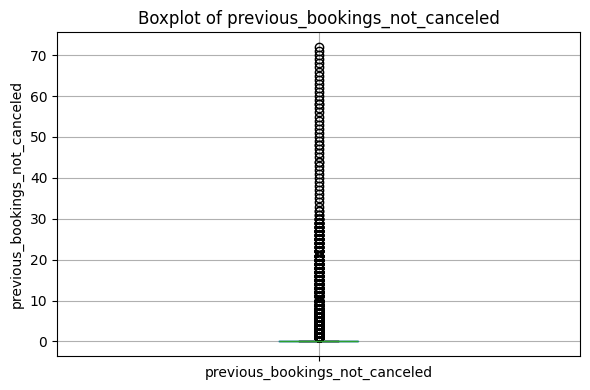

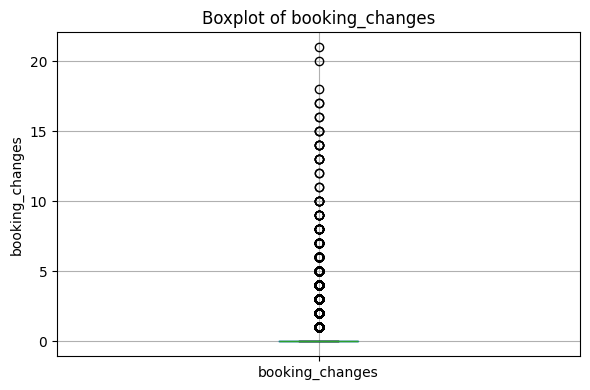

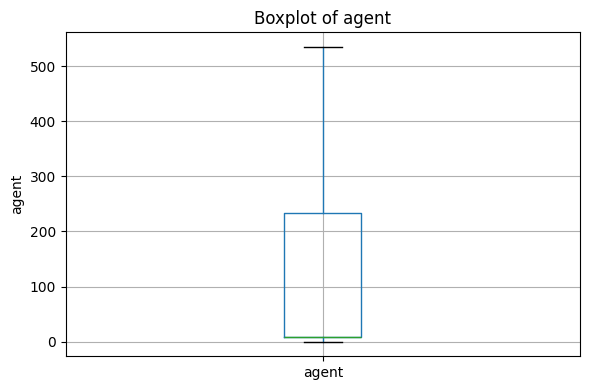

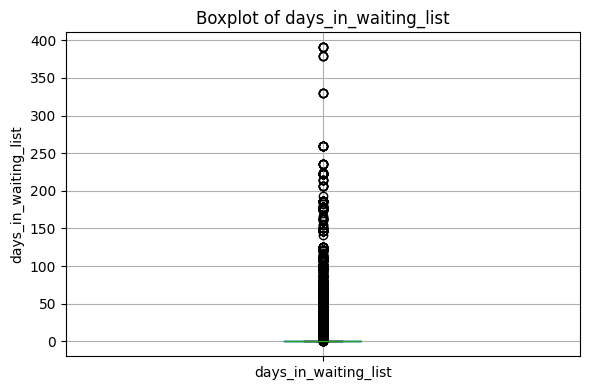

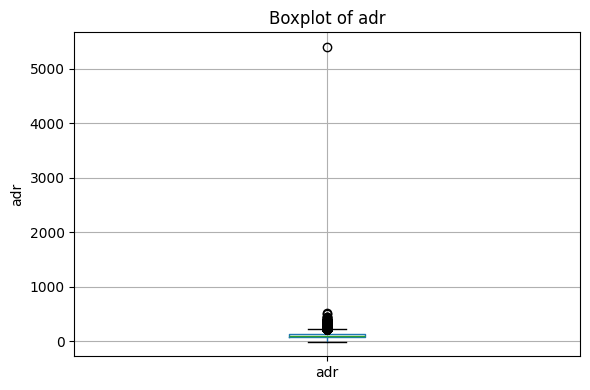

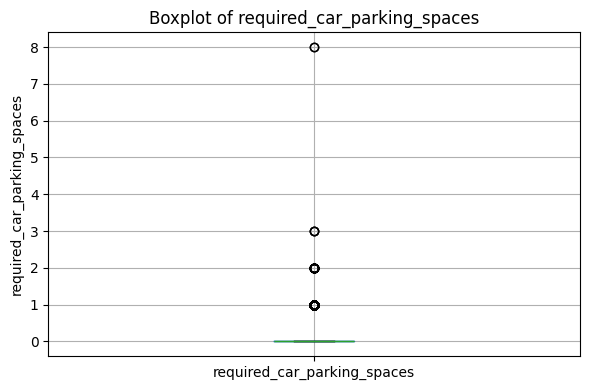

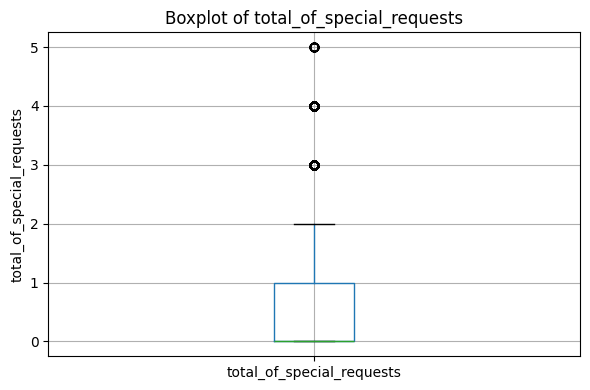

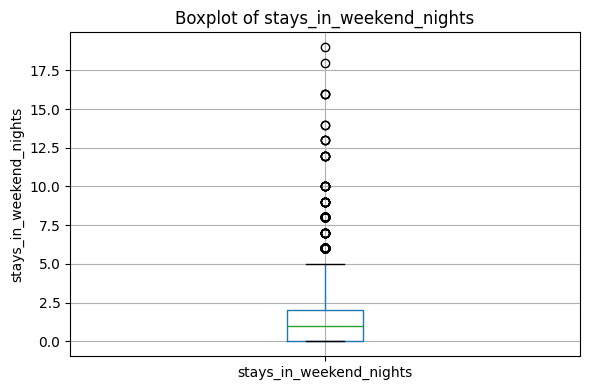

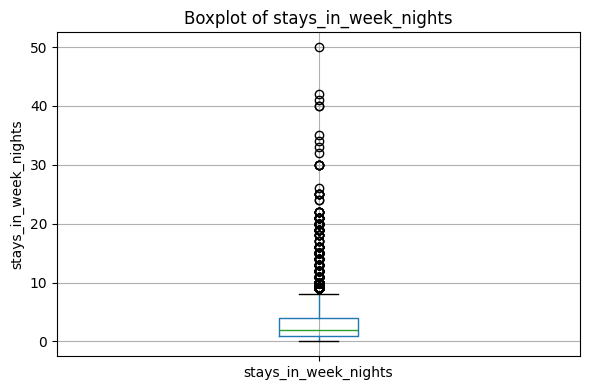

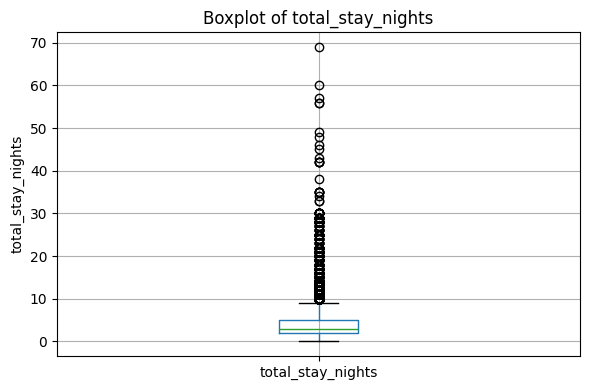

In [73]:
# Identify numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'int32', 'int16', 'float64']).columns

# Plot boxplots for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    df.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [74]:
df['revenue_generated'] = df['adr'] * df['total_stay_nights']

{'whiskers': [<matplotlib.lines.Line2D at 0x7d611f641710>,
 'caps': [<matplotlib.lines.Line2D at 0x7d6120d308d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d611f69ae10>],
 'medians': [<matplotlib.lines.Line2D at 0x7d6120d37b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d6120d2a110>],
 'means': []}

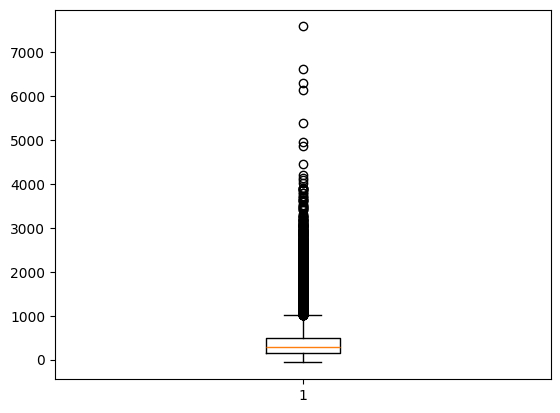

In [75]:
plt.boxplot(df['revenue_generated'])

# 2. 📊 Exploratory Data Analysis


## Univariate and bivariate and multivariate analysis using relevant plots

## Univariate

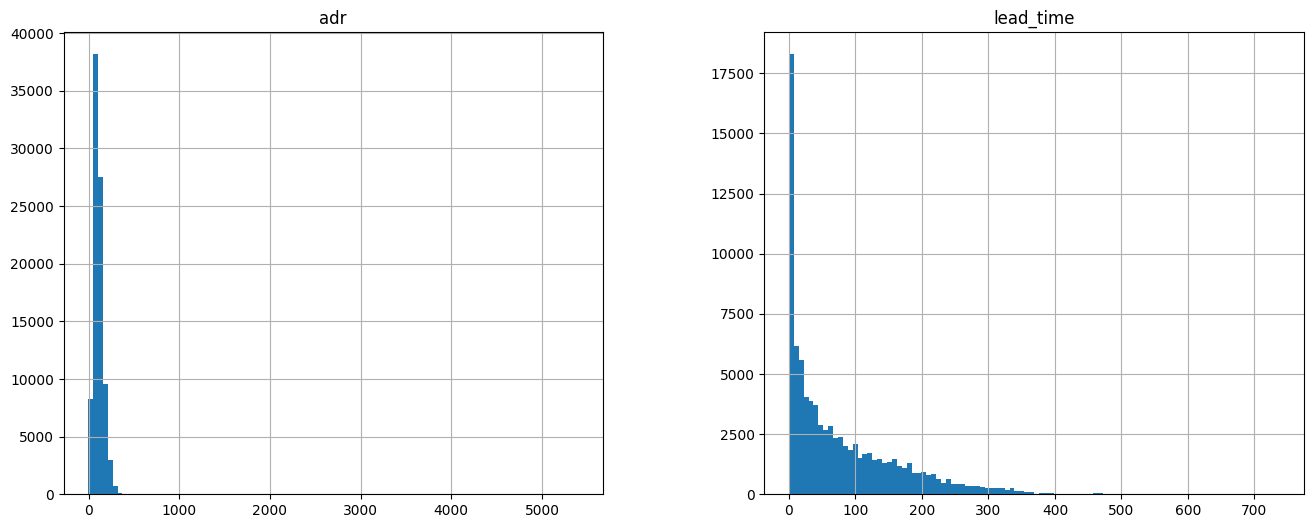

In [76]:
import seaborn as sns


numeric_columns = ['adr', 'lead_time']
df[numeric_columns].hist(bins=100, figsize=(16, 6))
plt.show()

# Lead_Time
# X-axis: Lead Time
# Y-axis: Number of Bookings
# The distribution is mostly right-skewed.
# Most bookings are made close to arrival date (many with 0-1 days lead time).
# Majority of guests are last-minute bookers.
# Fewer people plan stays well in advance.
# Useful for dynamic pricing and demand forecasting.

#Adr
# X-axis: Average Daily Rate
# Y-axis: Number of Bookings
# Distribution is mostly Right Skewed
# Most of the people are paying rate of 30-100
# Few of them are paying higher rates

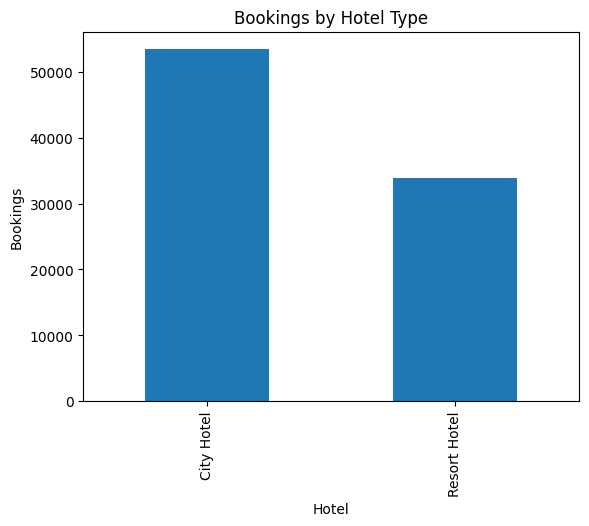

In [77]:
#Plotting Hotel
df['hotel'].value_counts().plot(kind='bar')
plt.xlabel('Hotel')
plt.ylabel('Bookings')
plt.title('Bookings by Hotel Type')
plt.show()

#booking of city hotel are around 52000 and resort hotel are around 35000
#City hotels have almost double the bookings compared to resort hotels.

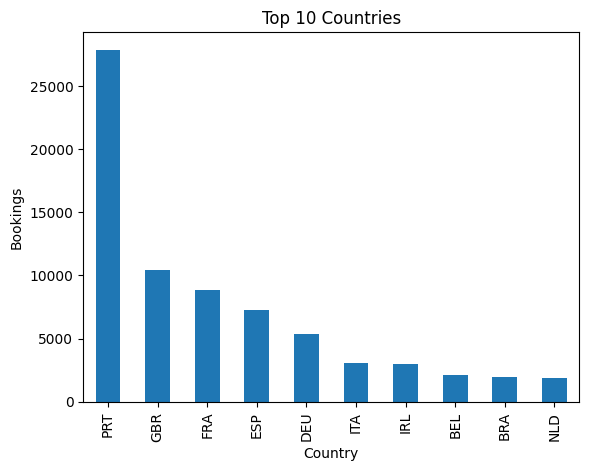

In [78]:
# plotting top 10 countries
plt.figure()
df['country'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Bookings')
plt.title('Top 10 Countries')
plt.show()

# The three-letter code "PRT" represents the country of Portugal
# Here we can see that Hotel bookings in Portugal has the highest number of bookings as compared to
# other countries around 27000 bookings

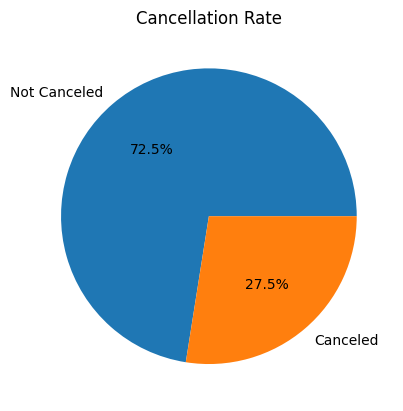

In [79]:
# Cancellations pie
plt.figure()
df['is_canceled'].replace({0:'Not Canceled',1:'Canceled'}).value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Cancellation Rate')
plt.ylabel('')
plt.show()

#72.5% of bookings were not canceled
#27.5% of Bookings were cancelled
#We can Interpret that most of the booking followed and had a contribution in revenue generation


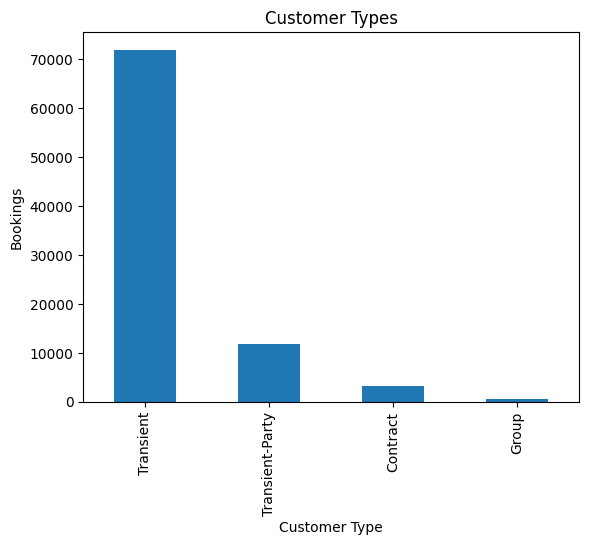

In [80]:
# Customer types
plt.figure()
df['customer_type'].value_counts().plot(kind='bar')
plt.xlabel('Customer Type')
plt.ylabel('Bookings')
plt.title('Customer Types')
plt.show()

#Customer types:
#Transient: around 71K → Majority are solo travelers.
#Transient-Party: around 11K → Small group trips.
#Contract: around 1–2K → Few corporate bookings.
#Group: Very few → Not a focus segment.

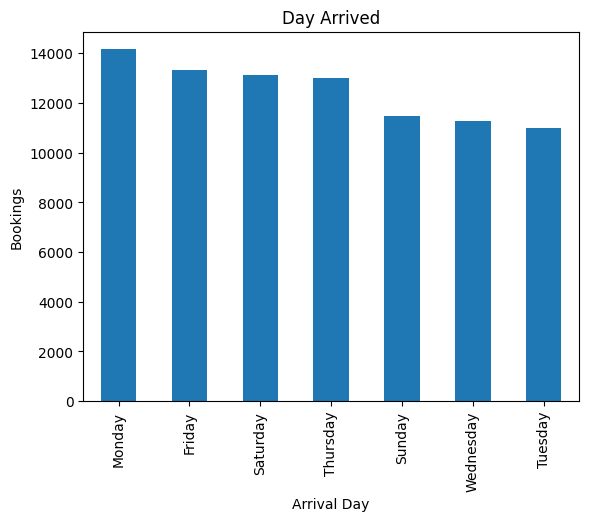

In [81]:
plt.figure()
df['arrival_day_name'].value_counts().plot(kind='bar')
plt.xlabel('Arrival Day')
plt.ylabel('Bookings')
plt.title('Day Arrived')
plt.show()


#Monday is at top with around 14K bookings.
#Followed closely by Weekend(Friday and Saturday.)
# Thursday and Sunday shows slightly fewer arrivals.
#Most guests arrive just before or at the start of the weekend, likely to maximize their stay.

## Bivariate

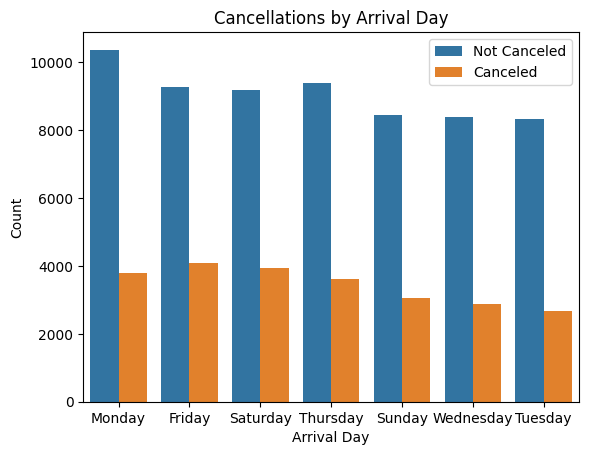

In [82]:
sns.countplot(x='arrival_day_name', hue='is_canceled', data=df,
              order=df['arrival_day_name'].value_counts().index)
plt.title('Cancellations by Arrival Day')
plt.xlabel('Arrival Day')
plt.ylabel('Count')
plt.legend(['Not Canceled', 'Canceled'])
plt.show()


#In this graph we can see that most of the cancellations are done on Friday
#Highest cancellations on Friday and Saturday
#Lowest cancellations on Tuesday and Wednesday
#Monday has the most bookings not canceled
#Guests arriving Weekedn (Friday and Saturday) tend to cancel more often,
#whereas arrivals on weekends and early week show better retention.

<Axes: xlabel='arrival_day_name'>

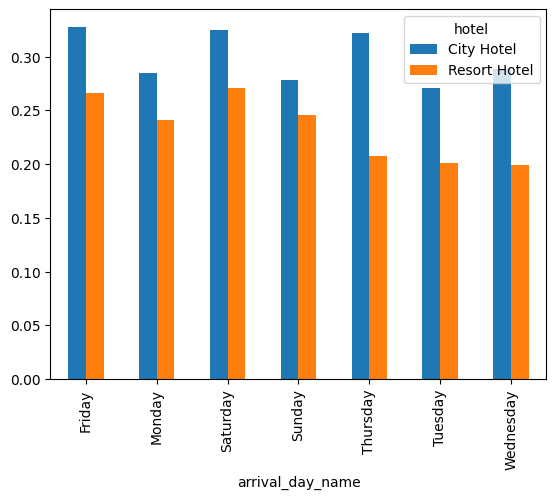

In [83]:
pd.crosstab(df['arrival_day_name'], df['hotel'], values=df['is_canceled'], aggfunc='mean').plot(kind='bar')

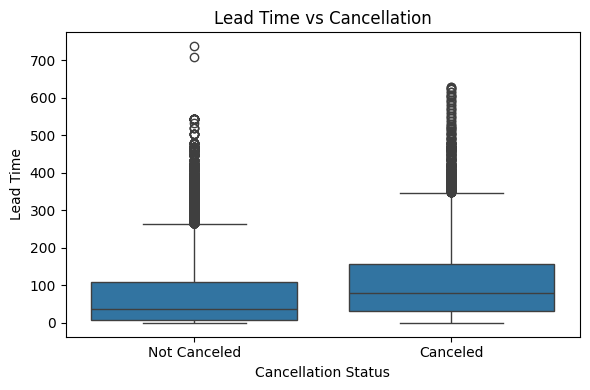

In [84]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='is_canceled', y='lead_time')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.title('Lead Time vs Cancellation')
plt.xlabel('Cancellation Status')
plt.ylabel('Lead Time')
plt.tight_layout()
plt.show()


#People who cancel tend to book much earlier — their lead time is higher (30–150 days).
#There are many outliers in cancellations — bookings made 500+ days in advance are frequently canceled.
#People who don’t cancel usually book with shorter notice — lead time is around 0–100 days, with fewer extreme outliers.

<ipython-input-85-d7d5d225a055>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('lead_time_group')['booking_changes'].mean().plot(kind='bar')


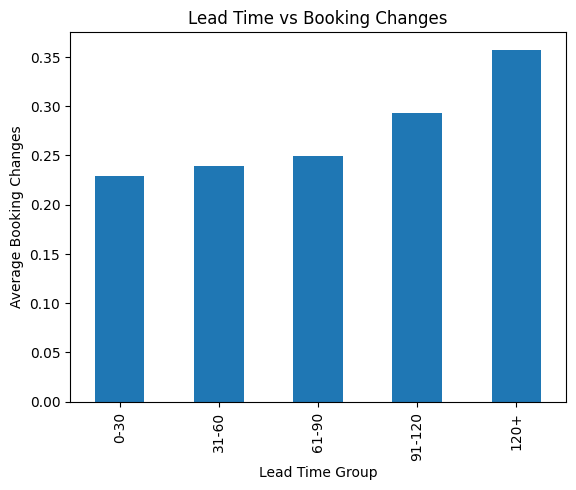

In [85]:
lead_time_bins = [0, 30, 60, 90, 120, 400]
labels = ['0-30', '31-60', '61-90', '91-120', '120+']
df['lead_time_group'] = pd.cut(df['lead_time'], bins=lead_time_bins, labels=labels, include_lowest=True)
plt.figure()
df.groupby('lead_time_group')['booking_changes'].mean().plot(kind='bar')
plt.xlabel('Lead Time Group')
plt.ylabel('Average Booking Changes')
plt.title('Lead Time vs Booking Changes')
plt.show()


#Slightly higher booking changes appear in the longer lead time group (120+ days) at 0.35.
#The lowest average booking changes are in the 31-90 day range (~0.20).
#This suggests that customers who book very early (120+ days) might be more
#likely to modify their reservations slightly more than those who book closer to the arrival date.

# 3. Correlation Analysis

## Compute Pearson/Spearman correlation matrix for numeric feature. Visualize correlations using heatmaps to detect multicollinearity. Explore how strongly adr is influenced by lead time, special requests, and booking changes


In [86]:
numeric_cols = ['adr', 'lead_time', 'total_of_special_requests', 'booking_changes']

df_numeric = df[numeric_cols]
pearson_corr = df_numeric.corr(method='pearson')
pearson_corr

,adr,lead_time,total_of_special_requests,booking_changes
adr,1.000000,0.023412,0.137648,0.002477
lead_time,0.023412,1.000000,0.034126,0.076934
total_of_special_requests,0.137648,0.034126,1.000000,0.016087
booking_changes,0.002477,0.076934,0.016087,1.000000


* adr & lead\_time:
  Very weak positive linear relationship — practically no linear correlation. A slightly longer lead time might have a marginal effect on reducing ADR, but this impact is negligible.

---

* adr & total\_of\_special\_requests:
  Weak positive correlation — bookings with more special requests tend to have a slightly higher ADR, though the relationship is not very strong.

---

* adr & booking\_changes:
  Almost no linear relationship between booking changes and ADR — the effect is so small that it can be considered negligible.

---

* lead\_time & total\_of\_special\_requests:
  Very weak positive correlation — longer lead times have a very minor tendency to correlate with a slight increase in the number of special requests, though the effect is minimal.

---

* lead\_time & booking\_changes:
  Almost no relationship — there is no discernible linear correlation between lead time and the number of booking changes.

---

* total\_of\_special\_requests & booking\_changes:
  Very weak positive correlation — there’s a slight trend where bookings with more special requests might see a slightly higher number of booking changes, but the correlation is weak.

In [87]:
spearman_corr = df_numeric.corr(method='spearman')
spearman_corr

,adr,lead_time,total_of_special_requests,booking_changes
adr,1.000000,0.107503,0.162095,-0.010715
lead_time,0.107503,1.000000,0.063284,0.056071
total_of_special_requests,0.162095,0.063284,1.000000,-0.004961
booking_changes,-0.010715,0.056071,-0.004961,1.000000


* adr & lead\_time:
  Almost no monotonic relationship. Changing lead time doesn’t consistently increase or decrease ADR.

* adr & total\_of\_special\_requests:
  Weak positive monotonic relationship. As special requests increase, ADR tends to increase slightly, but not strongly.

* adr & booking\_changes:
  Essentially no monotonic relationship between booking changes and ADR.

* lead\_time & total\_of\_special\_requests:
  Very weak positive relationship — longer lead time slightly correlates with more special requests, but the effect is minimal.

* lead\_time & booking\_changes:
  Very weak positive relationship — longer lead time is weakly associated with a slight increase in the number of booking changes.

* total\_of\_special\_requests & booking\_changes:
  Very weak positive relationship — more special requests are very weakly associated with more booking changes.

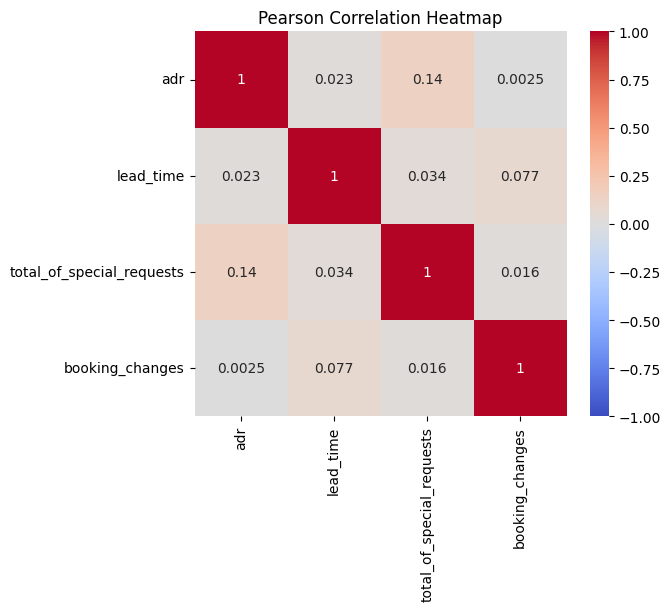

In [88]:
plt.figure(figsize=(6, 5))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Heatmap')
plt.show()

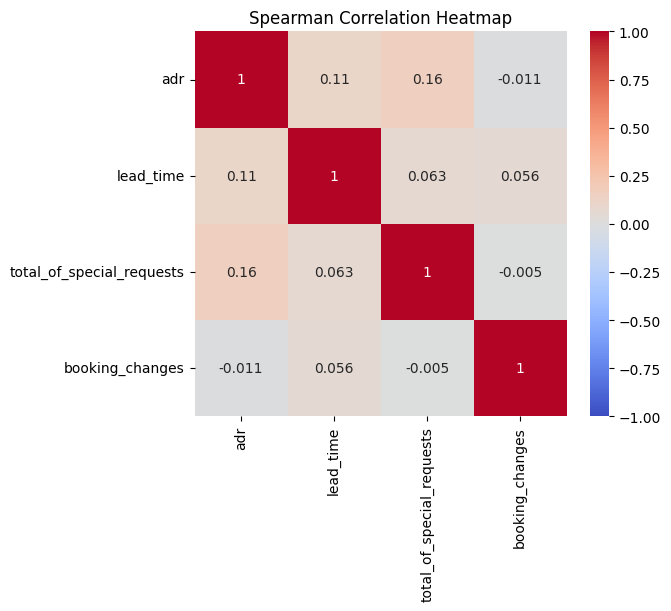

In [89]:
plt.figure(figsize=(6, 5))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman Correlation Heatmap')
plt.show()


Pearson might be close to 0, indicating no linear relationship.

Spearman could be slightly higher/lower if there's a monotonic trend.

# 4.  Hypothesis Testing

## Use statistical tests to validate business assumptions:


## H0: There is no difference in ADR between bookings made through Online TA and Direct channels
## **Two-Sample t-test (independent samples, continuous variable ADR)**

In [90]:
from scipy.stats import ttest_ind

online_ta_adr = df[df['distribution_channel'] == 'TA/TO']['adr']
direct_adr = df[df['distribution_channel'] == 'Direct']['adr']

t_stat, p_value = ttest_ind(online_ta_adr, direct_adr, equal_var=False)
print(f"T-Statistic: {t_stat:.4f}\nP-Value: {p_value:.4f}")

T-Statistic: -0.9735
P-Value: 0.3303


* The p-value (0.3303) is much greater than the typical alpha level.

* Therefore, you fail to reject the null hypothesis.

## H0: Room upgrades are independent of lead time
## (Room upgrade = assigned_room_type ≠ reserved_room_type)
## Chi-Square Test of Association

In [91]:
from scipy.stats import chi2_contingency
df['room_upgrade'] = np.where(
    df['assigned_room_type'].astype(str) != df['reserved_room_type'].astype(str),
    1, 0
)

lead_time_bins = [0, 30, 60, 90, 120, df['lead_time'].max()]
lead_time_labels = ['0-30', '31-60', '61-90', '91-120', '120+']
df['lead_time_group'] = pd.cut(df['lead_time'], bins=lead_time_bins, labels=lead_time_labels, include_lowest=True)

contingency_table = pd.crosstab(df['lead_time_group'], df['room_upgrade'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistic : {chi2:.4f}, P-value : {p:.4f}")



Chi2 Statistic : 1642.7883, P-value : 0.0000


* Here P value : 0.0000 is less than 0.05, then
* Reject H₀: There is an association between room upgrade and lead time.

## Ho: Average stay duration does not differ between customer types


In [92]:
from scipy.stats import f_oneway
df['stay_duration'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
customer_groups = df['customer_type'].unique()
grouped_stays = [df[df['customer_type'] == ctype]['stay_duration'] for ctype in customer_groups]
f_stat, p_value = f_oneway(*grouped_stays)
print("One-Way ANOVA Test: Stay Duration by Customer Type")
print("--------------------------------------------------")
print(f"F-statistic: {f_stat:.4f}\nP-value: {p_value:.4f}")



One-Way ANOVA Test: Stay Duration by Customer Type
--------------------------------------------------
F-statistic: 880.6216
P-value: 0.0000


* Here P value : 0.0000 is less than 0.05, then
* Reject H₀:  Average stay duration differs by customer type.

# 5.  Key Business Questions

## 1) What influences ADR the most?

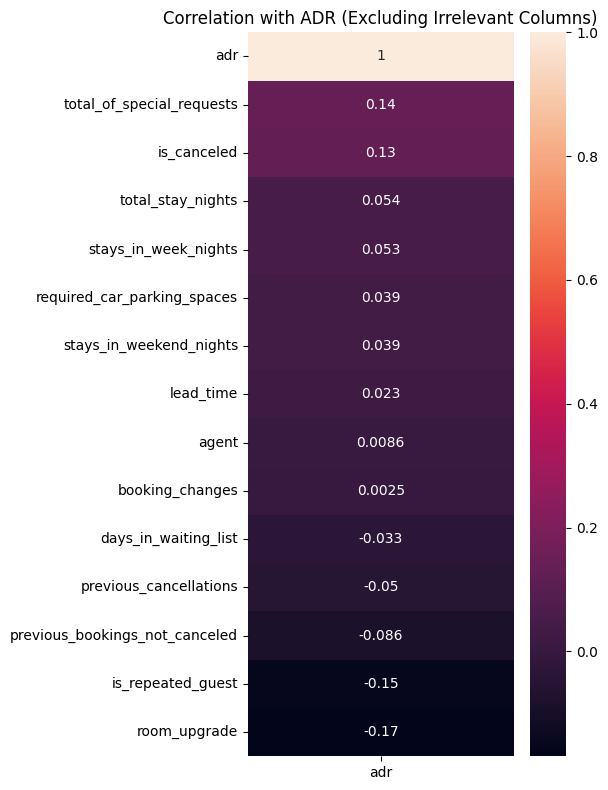

In [93]:
corr_matrix = df.corr(numeric_only=True)

exclude_cols = ['revenue_generated', 'total_members', 'adults', 'children', 'babies','stay_in_weekend_nights','stay_duration','']

filtered_corr = corr_matrix.drop(index=exclude_cols, errors='ignore')

plt.figure(figsize=(6, 8))
sns.heatmap(filtered_corr[['adr']].sort_values(by='adr', ascending=False), annot=True)
plt.title('Correlation with ADR (Excluding Irrelevant Columns)')
plt.tight_layout()
plt.show()


After excluding irrelevant columns, the correlation analysis shows that total special requests have the strongest (but still weak) positive influence on ADR. Lead time has a slight positive effect, while booking changes have negligible impact on pricing.

## 2) Do guests who book earlier tend to request more changes?


Pearson correlation: 0.0769 (p-value: 0.0000)


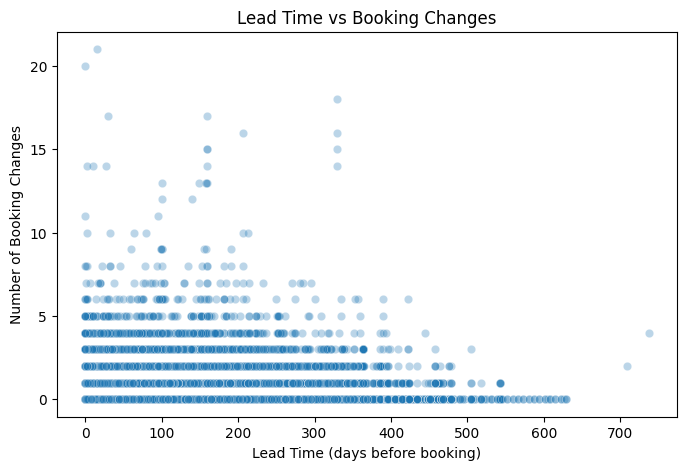

In [94]:
from scipy.stats import pearsonr, spearmanr

pearson_corr, pearson_p = pearsonr(df['lead_time'], df['booking_changes'])
print(f"Pearson correlation: {pearson_corr:.4f} (p-value: {pearson_p:.4f})")

plt.figure(figsize=(8,5))
sns.scatterplot(x='lead_time', y='booking_changes', data=df, alpha=0.3)
plt.title('Lead Time vs Booking Changes')
plt.xlabel('Lead Time (days before booking)')
plt.ylabel('Number of Booking Changes')
plt.show()



* Guests who book earlier tend to request a bit more changes.

* However, the effect size is very small (correlation ~0.08), so lead time is not a strong predictor of booking changes by itself.

## 3) Are there pricing or booking differences across countries?


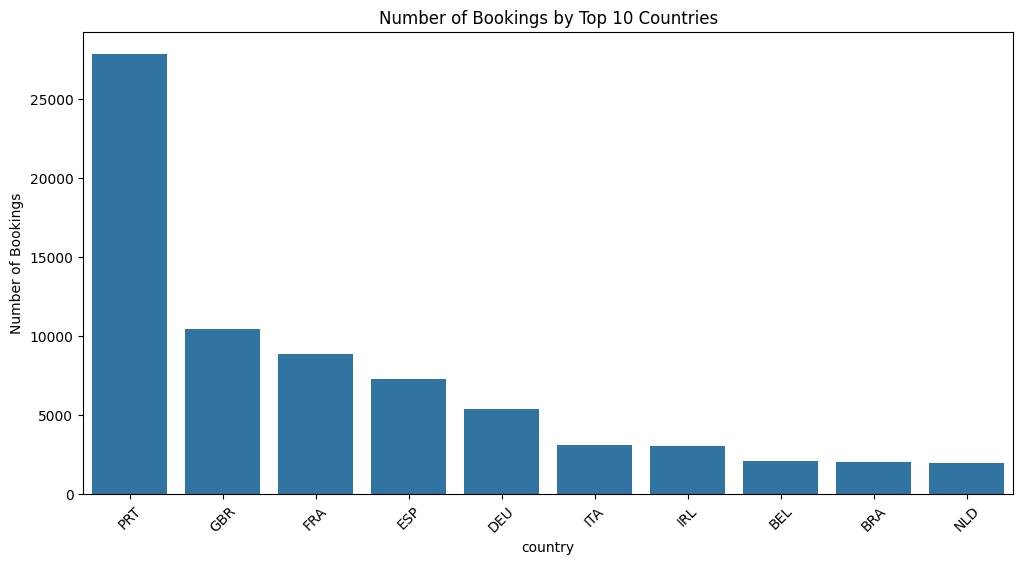

ANOVA F-statistic: 239.4015
ANOVA p-value: 0.0000


In [129]:
top_countries = df['country'].value_counts().head(10).index

df_top_countries = df[df['country'].isin(top_countries)]

plt.figure(figsize=(12,6))
sns.countplot(data=df_top_countries, x='country', order=top_countries)
plt.title('Number of Bookings by Top 10 Countries')
plt.xticks(rotation=45)
plt.ylabel('Number of Bookings')
plt.show()

adr_groups = [df[df['country'] == country]['adr'] for country in top_countries]

f_stat, p_value = f_oneway(*adr_groups)

print(f"ANOVA F-statistic: {f_stat:.4f}")
print(f"ANOVA p-value: {p_value:.4f}")


Top 10 countries by bookings show varying average daily rates (ADR). Portugal (PRT) leads in bookings with 27,879, having an average ADR of about 95. Guests from Spain (ESP) and Italy (ITA) tend to pay higher rates, with average ADRs above 115. Overall, while booking volumes differ, pricing varies significantly across countries.


* Average daily rates (ADR) differ significantly by country, showing guests from different countries pay different prices.
* The top booking countries are Portugal, Great Britain, and France.

## 4) Is there a pattern in room upgrades or reassignment?


In [99]:
df['room_change'] = df['reserved_room_type'].astype(str) != df['assigned_room_type'].astype(str)

change_rate = df['room_change'].mean()
print(f"Overall room reassignment rate: {change_rate:.2%}")


Overall room reassignment rate: 14.99%


About 15% of bookings involved a room reassignment, where the assigned room type differed from the originally reserved room type.


## 5) Are reserved room types consistently matched with assigned room types?


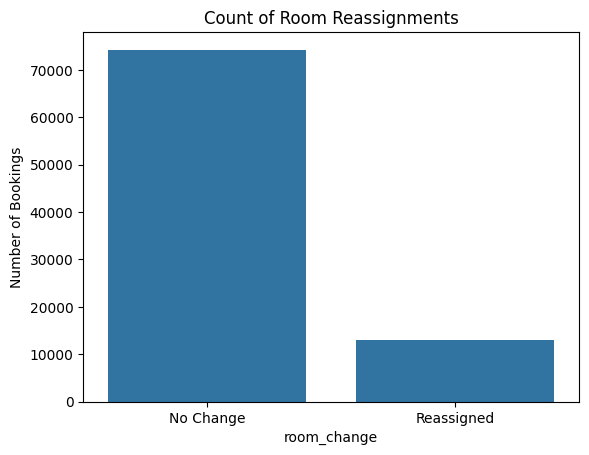

In [127]:
sns.countplot(data=df, x='room_change')
plt.title("Count of Room Reassignments")
plt.xticks([0, 1], ['No Change', 'Reassigned'])
plt.ylabel("Number of Bookings")
plt.show()


Most bookings (about 74,266) had no room change, while around 13,097 bookings experienced room reassignment. Room changes occurred in roughly 15% of the cases.


## 6) What are the most common guest demographics (e.g., group size, nationality)?


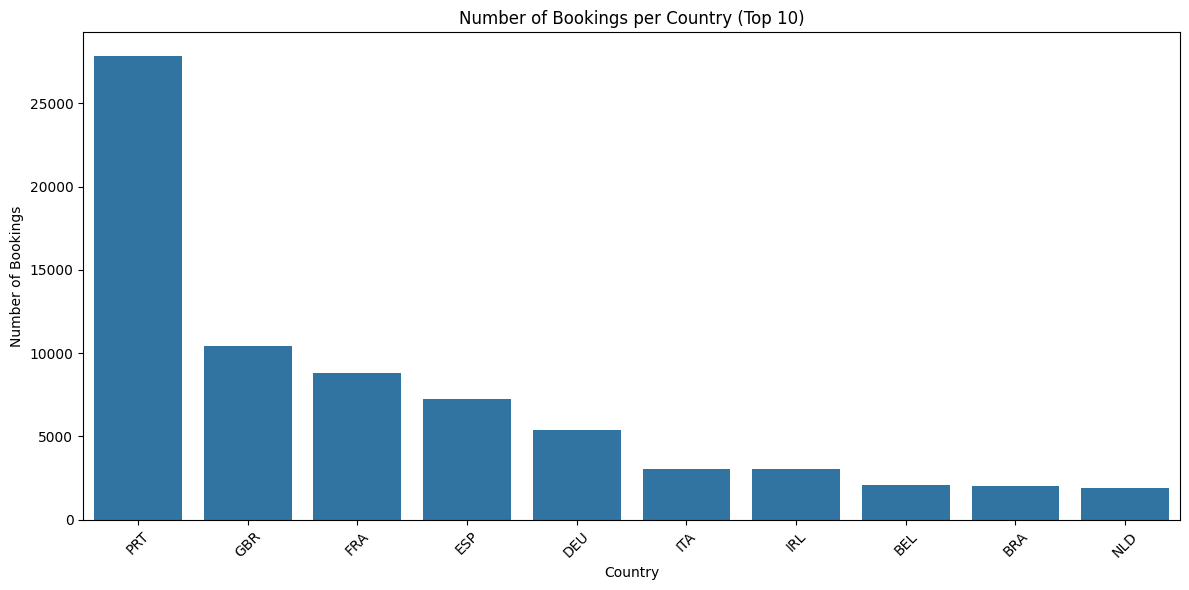

In [125]:
df['country'] = df['country'].astype(str)

top_ten_countries = df['country'].value_counts().head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=top_ten_countries.index, y=top_ten_countries.values)
plt.title('Number of Bookings per Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The top 10 countries with the highest number of bookings are led by Portugal (PRT) with 27,879 bookings, followed by Great Britain (GBR) with 10,432 bookings, and France (FRA) with 8,837 bookings. Other countries like Spain, Germany, Italy, Ireland, Belgium, Brazil, and the Netherlands also contribute significantly, each with bookings ranging from around 1,900 to 7,200.

##  7) Are there patterns in guest types (e.g., transient vs. corporate) that influence booking behavior?

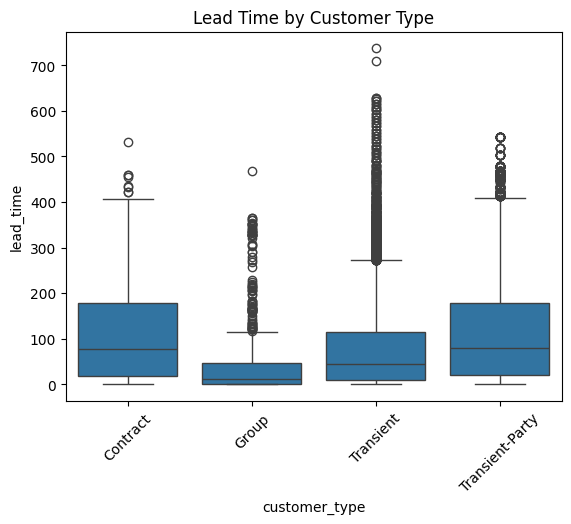

In [119]:
sns.boxplot(data=df, x='customer_type', y='lead_time')
plt.title('Lead Time by Customer Type')
plt.xticks(rotation=45)
plt.show()

Guests in the Transient-Party and Contract customer types tend to book the earliest, with average lead times of about 113 and 109 days respectively. Transient guests book with a moderate lead time of around 73 days, while Group bookings have the shortest lead time, averaging about 52 days. The majority of bookings come from Transient guests.

<ipython-input-121-a1eeabc134bc>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancel_rates = df.groupby('customer_type')['is_canceled'].mean().reset_index()


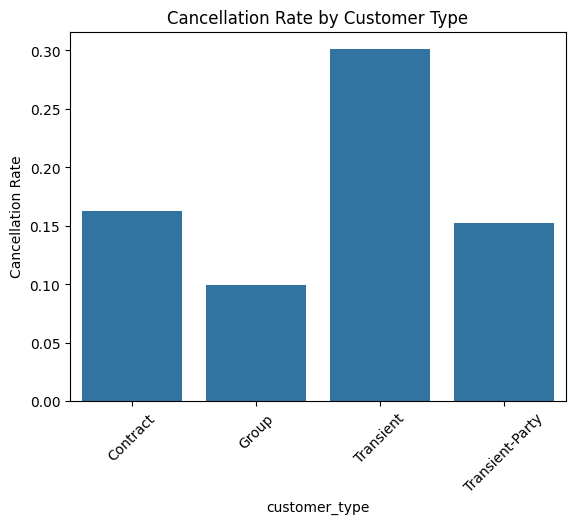

In [121]:
cancel_rates = df.groupby('customer_type')['is_canceled'].mean().reset_index()

sns.barplot(data=cancel_rates, x='customer_type', y='is_canceled')
plt.title('Cancellation Rate by Customer Type')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.show()

Transient customers have the highest cancellation rate (~30%).

Contract and Transient-Party customers show moderate cancellation rates (~16% and ~15%).

Group bookings have the lowest cancellation rate (~10%).

## 8) How does booking lead time vary across customer types and countries?


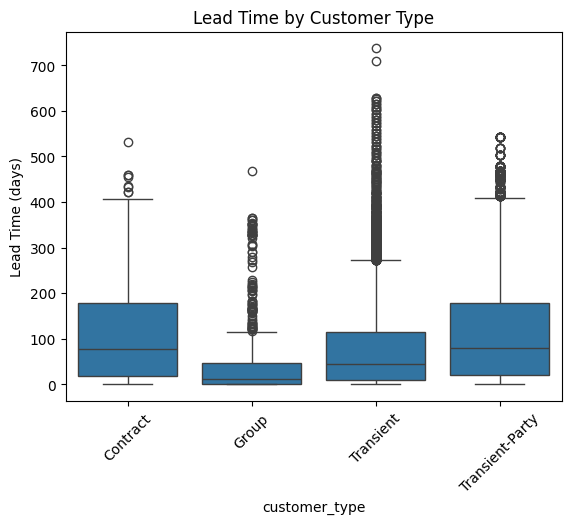

In [117]:
sns.boxplot(data=df, x='customer_type', y='lead_time')
plt.title('Lead Time by Customer Type')
plt.xticks(rotation=45)
plt.ylabel('Lead Time (days)')
plt.show()


Transient-Party and Contract customers have the longest lead times (113 & 109 days).

Transient bookings are most common but have a shorter lead time (~73 days).

Group bookings have the shortest lead time (~52 days) and are least frequent.

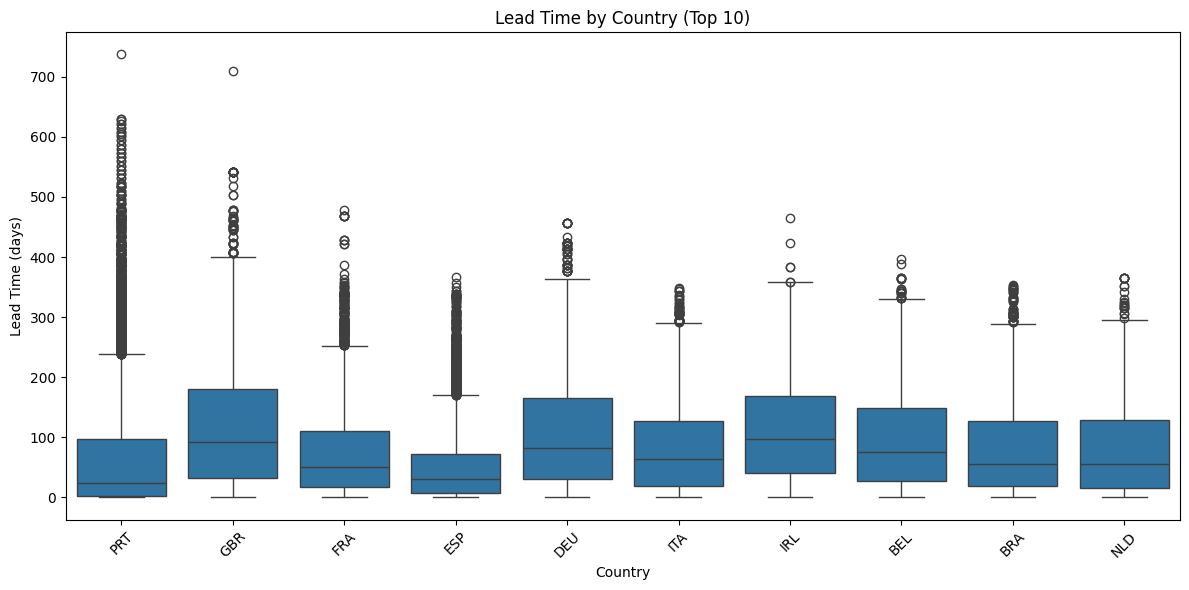

In [115]:

top_countries = df['country'].value_counts().head(10).index.tolist()


df_top_countries = df[df['country'].isin(top_countries)].copy()
df_top_countries['country'] = df_top_countries['country'].astype(str)  # convert from categorical safely

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_countries, x='country', y='lead_time', order=top_countries)
plt.title('Lead Time by Country (Top 10)')
plt.ylabel('Lead Time (days)')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Longest lead times: GBR (117 days), IRL (114), DEU (105) – early planners.

Shortest: ESP (52), PRT (64) – more last-minute bookings.

Moderate: FRA, ITA, BRA, NLD – around 74–83 days.

🇵🇹 Portugal leads in booking count but books moderately early.

Conclusion: Lead time varies widely by country; UK & Ireland book earliest, Spain latest.

## 9) Are longer lead times associated with fewer booking changes or cancellations?


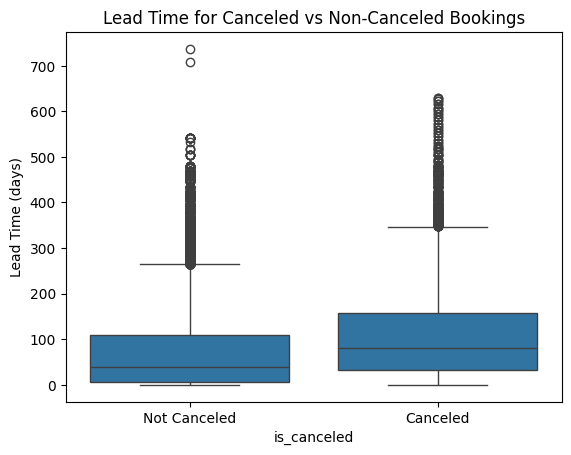

In [132]:
sns.boxplot(data=df, x='is_canceled', y='lead_time')
plt.title('Lead Time for Canceled vs Non-Canceled Bookings')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.ylabel('Lead Time (days)')
plt.show()


Guests who canceled booked much earlier (about 106 days) than those who didn’t (about 70 days). Most bookings did not get canceled.



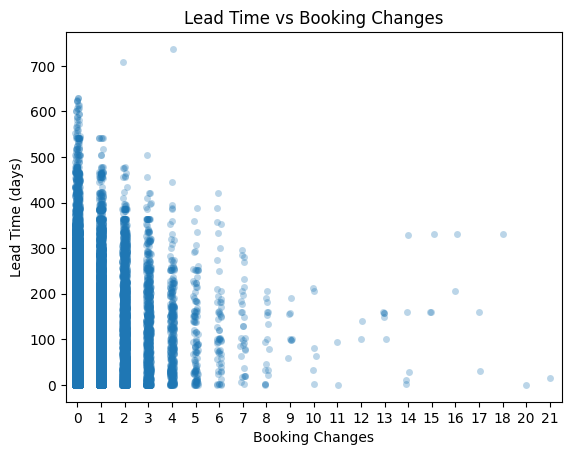

In [136]:
sns.stripplot(data=df, x='booking_changes', y='lead_time', jitter=True, alpha=0.3)
plt.title('Lead Time vs Booking Changes')
plt.ylabel('Lead Time (days)')
plt.xlabel('Booking Changes')
plt.show()

People who change their bookings more tend to book earlier. Most don’t change, but those with multiple changes have longer lead times.

## 10) What is the typical duration of stay, and how does it vary by customer type or segment?

In [141]:
print("Overall average stay duration:", df['total_stay_nights'].mean())
print("Median stay duration:", df['total_stay_nights'].median())


Overall average stay duration: 3.631308448656754
Median stay duration: 3.0


On average, people stay about 3.6 nights, and usually, the typical stay is around 3 nights.

In [143]:
avg_stay_customer = df.groupby('customer_type')['total_stay_nights'].mean().reset_index().sort_values(by='total_stay_nights', ascending=False)
print(avg_stay_customer)


     customer_type  total_stay_nights
0         Contract           6.034406
2        Transient           3.579145
3  Transient-Party           3.340872
1            Group           2.920956


<ipython-input-143-8c543ba6425e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_stay_customer = df.groupby('customer_type')['total_stay_nights'].mean().reset_index().sort_values(by='total_stay_nights', ascending=False)


People on contract tend to stay the longest (about 6 nights), while groups stay the shortest (around 3 nights). Transient and transient-party customers fall in between with stays of about 3.3 to 3.6 nights.

In [146]:
avg_stay_segment = df.groupby('market_segment')['total_stay_nights'].mean().reset_index().sort_values(by='total_stay_nights', ascending=False)
print(avg_stay_segment)


  market_segment  total_stay_nights
5  Offline TA/TO           4.702434
6      Online TA           3.607793
0       Aviation           3.572687
4         Groups           3.450699
3         Direct           3.232093
2      Corporate           2.045455
1  Complementary           1.669516
7      Undefined           1.500000


<ipython-input-146-1db017bb5a0c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_stay_segment = df.groupby('market_segment')['total_stay_nights'].mean().reset_index().sort_values(by='total_stay_nights', ascending=False)


Guests booking through Offline travel agents stay the longest (about 4.7 nights), while those from Undefined or Complementary segments stay the shortest (around 1.5 to 1.7 nights). Others like Online travel agents, Aviation, and Groups have stays between 3 to 3.6 nights. Corporate guests stay for about 2 nights on average.


## 11) How often are guests upgraded or reassigned to a different room type?


In [147]:
change_rate = df['room_change'].mean()
print(f"Overall room reassignment rate: {change_rate:.2%}")

Overall room reassignment rate: 14.99%


About 15% of guests get their rooms changed from what they originally booked.


## 12) Are guests who make special requests more likely to experience booking changes or longer stays?


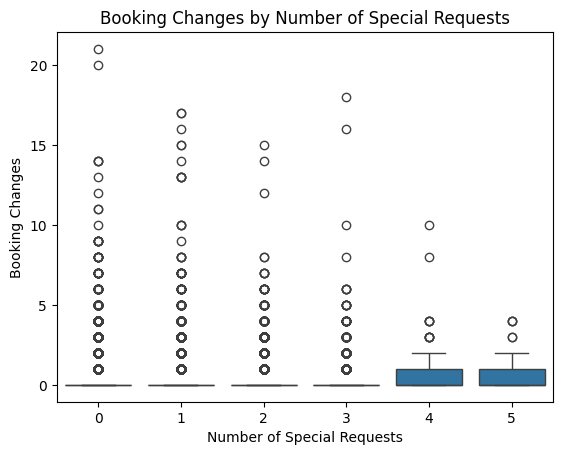

In [150]:
sns.boxplot(data=df, x='total_of_special_requests', y='booking_changes')
plt.title('Booking Changes by Number of Special Requests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Booking Changes')
plt.show()


People who make more special requests tend to change their bookings more often. For example, those with 5 special requests change bookings the most, while those with none or just one request change less.


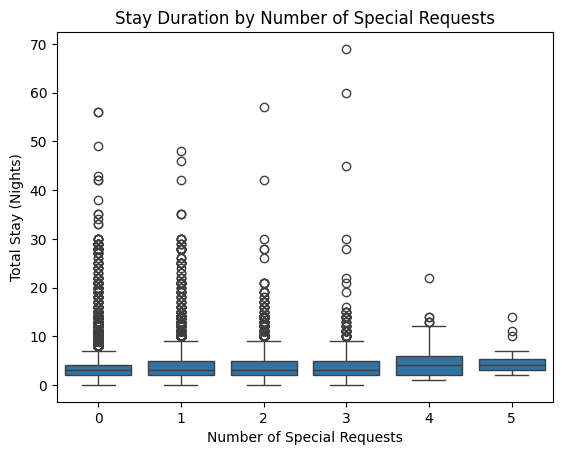

In [155]:
sns.boxplot(data=df, x='total_of_special_requests', y='total_stay_nights')
plt.title('Stay Duration by Number of Special Requests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Total Stay (Nights)')
plt.show()


Guests who make more special requests tend to stay longer. For example, those with no special requests stay about 3.5 nights on average, while guests with 5 special requests stay almost 5 nights. So, more requests usually mean a longer stay.

## 13) Do certain market segments or distribution channels show higher booking consistency or revenue?


In [156]:
booking_consistency = df.groupby('market_segment')['is_canceled'].mean()
booking_consistency = (1 - booking_consistency).sort_values(ascending=False) * 100
print("Booking Consistency (%) by Market Segment:\n", booking_consistency)


Booking Consistency (%) by Market Segment:
 market_segment
Corporate        87.862922
Complementary    87.464387
Direct           85.275918
Offline TA/TO    85.150511
Aviation         80.176211
Groups           72.970237
Online TA        64.650829
Undefined         0.000000
Name: is_canceled, dtype: float64


<ipython-input-156-80f57ab3e780>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  booking_consistency = df.groupby('market_segment')['is_canceled'].mean()


Most bookings are consistent (meaning guests stick to their original plans) in the Corporate and Complementary segments, with about 87% consistency. Direct and Offline TA/TO are close behind at around 85%. Groups and Online TA have lower consistency, and the Undefined segment has no consistent bookings.


In [158]:
adr_by_segment = df.groupby('market_segment')['adr'].mean().sort_values(ascending=False)
print("Average ADR by Market Segment:\n", adr_by_segment)


Average ADR by Market Segment:
 market_segment
Online TA        118.176760
Direct           116.605364
Aviation         100.170396
Offline TA/TO     81.773430
Groups            74.836868
Corporate         68.231568
Undefined         15.000000
Complementary      3.049245
Name: adr, dtype: float64


<ipython-input-158-63b2f37ee55d>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adr_by_segment = df.groupby('market_segment')['adr'].mean().sort_values(ascending=False)


Online TA and Direct segments bring in the highest average revenue per day (ADR), over ₹116. Aviation is moderate, while Offline TA/TO and Groups are lower. Corporate, Complementary, and Undefined segments have the lowest ADR, with Complementary being almost free.


## 14) What factors are most strongly associated with higher ADR?



In [162]:
numericdf = df.select_dtypes(include=['number'])
numeric_corr = numericdf.corr(method='pearson')
adr_cor = numeric_corr['adr'].sort_values(ascending=False)
adr_cor = adr_cor.sort_values(ascending=False)
adr_cor

,adr
adr,1.000000
revenue_generated,0.555218
total_members,0.386867
children,0.326347
adults,0.248743
total_of_special_requests,0.137648
is_canceled,0.127944
stay_duration,0.053970
total_stay_nights,0.053970
stays_in_week_nights,0.053135


ADR is mostly influenced by revenue, number of guests, and special requests. Other factors like cancellations and stay length have minor effects.


## 16) Do bookings with more lead time or from specific countries yield higher ADR?


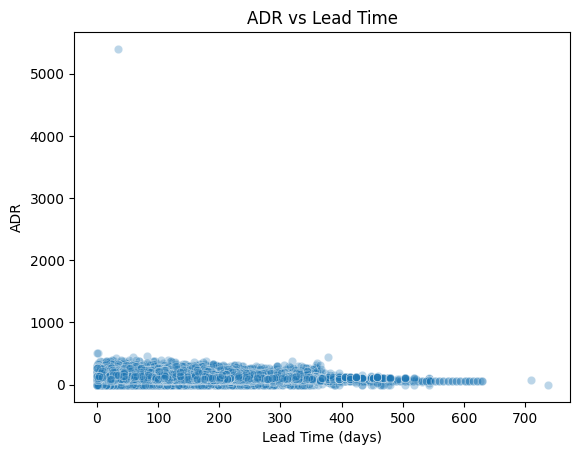

In [165]:
sns.scatterplot(data=df, x='lead_time', y='adr', alpha=0.3)
plt.title('ADR vs Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('ADR')
plt.show()

As lead time increases (how early someone books), the average price per night (ADR) generally goes up — peaking around 120 to 180 days in advance. People who book last-minute (0–30 days) or very early (after 210 days) tend to pay a bit less on average. Most bookings happen within the first 30 days.


## 17) Are guests with higher ADR more likely to request special services or make booking modifications?

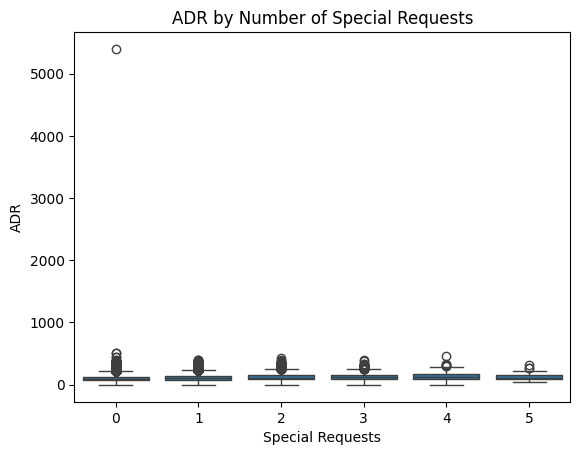

In [168]:
sns.boxplot(x='total_of_special_requests', y='adr', data=df)
plt.title('ADR by Number of Special Requests')
plt.xlabel('Special Requests')
plt.ylabel('ADR')
plt.show()


As the number of special requests increases, the average price paid per night (ADR) also goes up. Guests with no requests paid around ₹99, while those with 4–5 special requests paid over ₹130 on average. This suggests guests asking for more tend to book higher-priced rooms.


## 19) Are guests who make booking changes more likely to request additional services or cancel?

In [169]:
df_top_countries = df[df['country'].isin(top_countries)]


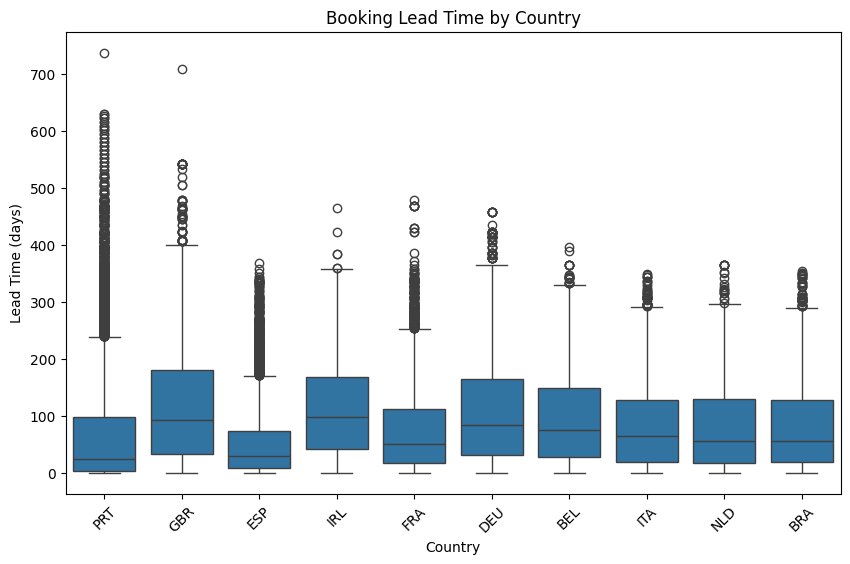

In [170]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_top_countries, x='country', y='lead_time')
plt.title("Booking Lead Time by Country")
plt.xlabel("Country")
plt.ylabel("Lead Time (days)")
plt.xticks(rotation=45)
plt.show()


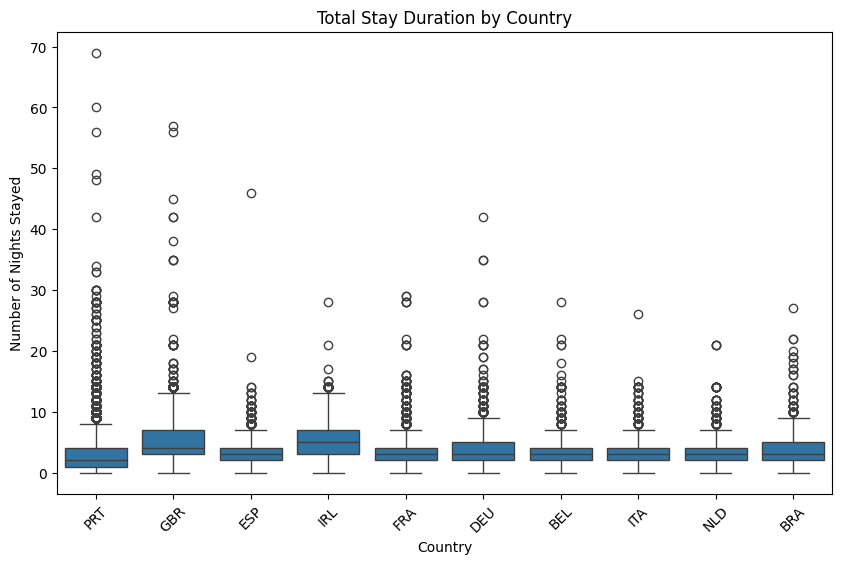

In [175]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_top_countries, x='country', y='total_stay_nights')
plt.title("Total Stay Duration by Country")
plt.xlabel("Country")
plt.ylabel("Number of Nights Stayed")
plt.xticks(rotation=45)
plt.show()

Here’s a short, layman-style summary:

🇵🇹 **Portugal** had the most bookings, but people booked with shorter notice (avg \~64 days).
🇬🇧 **UK**, 🇮🇪 **Ireland**, and 🇩🇪 **Germany** had much longer planning times—over 100 days on average.
🇪🇸 **Spain** and 🇧🇷 **Brazil** had shorter lead times, showing more last-minute bookings.
Overall, lead time varies a lot by country—some plan way ahead, others book closer to their stay.
